# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# To open the csv file
import pandas as pd
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

# To displays the first five columns
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests
import os
import pandas as pd 

folder_name = 'Image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(r.content)

df_image = pd.read_csv("Image_prediction/image-predictions.tsv", sep="\t", encoding="utf-8")
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt). The following are the steps to follow when using a Developer account:

import tweepy as tw
# Twitter API key and API secret
consumer_key = "Hidden"
consumer_secret = "Hidden"
access_token = 'Hidden'
access_secret = 'Hidden'

# authenticate
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tw.API(auth, parser = tw.parsers.JSONParser(), wait_on_rate_limit=True, wait_on_rate_limit_notify= True)

#Using the Tweet ID, download the Tweepy status object, then save it to a list.
tweets_lists = []
#Unaccessible tweets are stored in the list below:
unaccessible_tweets = []

for tweet_id in twitter_archive['tweet_id']:   
    try:
        tweets_lists.append(api.get_status(tweet_id))
    except Exception as e:
        unaccessible_tweets.append(tweet_id)

#Next, separate the json portion of each tweepy in this code block that was downloaded as a status object, 
#After put them all in a list.
dicts_list = []
for each_json_tweet in tweets_lists: 
    dicts_list.append(each_json_tweet)

print (dicts_list)

#write this list into a text file:
import json
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(dicts_list, indent=4))

#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
import json
my_list = []
with open('tweet-json.txt', encoding='utf-8') as json_file:  
    my_data = json.load(json_file)
my_data
    for each_dictionary in my_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

tweet_json.info()

In [4]:
import re
import json
# Create a list to store data extracted from the JSON file
tweet_json = []

# Open the JSON file and iterate through its lines
with open("tweet-json.txt", 'r') as file:
    # Each line in this file represents a JSON object, each of which is composed of a set of objects
    for line in file:
        # Loading the line object
        line_data = json.loads(line)
       
        # Extracting the targeted columns
        tweet_id = line_data["id"]
        favorite_count = line_data["favorite_count"]
        retweet_count = line_data["retweet_count"]
        full_text = line_data["full_text"]
        
        # Extract dog's name from full_text
        dog_name_sentence = re.search('([Tt]his is\s\w+)', full_text) or re.search('([Mm]eet\s\w+)', full_text)
        dog_name = ""
        
        # Check that our search returned a value
        if(dog_name_sentence):
            dog_name = dog_name_sentence.group().split()[-1]
        
        # Add extracted data to a list
        tweet_json.append({'tweet_id': tweet_id, 
                          'favorite_count': favorite_count, 
                          'retweet_count': retweet_count,
                          'name': dog_name
                         })
        
# Create a dataframe out of the constructed list
tweet_json = pd.DataFrame(tweet_json, columns=["tweet_id", "name", "favorite_count", "retweet_count"])

tweet_json.head()

,tweet_id,name,favorite_count,retweet_count
0,892420643555336193,Phineas,39467,8853
1,892177421306343426,Tilly,33819,6514
2,891815181378084864,Archie,25461,4328
3,891689557279858688,Darla,42908,8964
4,891327558926688256,Franklin,41048,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



Visual Assessments- For visual evaluation, every obtained piece of data is shown in the Jupyter Notebook.

In [5]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


The values in several columns of the archive table will be examined in the few lines that follow.

In [8]:
list(twitter_archive.source.unique())

['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

In [9]:
list(twitter_archive.doggo.unique())

['None', 'doggo']

In [10]:
list(twitter_archive.floofer.unique())

['None', 'floofer']

In [11]:
list(twitter_archive.pupper.unique())

['None', 'pupper']

In [12]:
list(twitter_archive.puppo.unique())

['None', 'puppo']

Now let us examine whether the archive database has any dog names missing.

In [13]:
twitter_archive[(twitter_archive.name.empty) | (twitter_archive.name == "None")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [14]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Programmatic Assessment.Pandas' functions and/or operations are used to evaluate the data.

In [15]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
tweet_json

,tweet_id,name,favorite_count,retweet_count
0,892420643555336193,Phineas,39467,8853
1,892177421306343426,Tilly,33819,6514
2,891815181378084864,Archie,25461,4328
3,891689557279858688,Darla,42908,8964
4,891327558926688256,Franklin,41048,9774
5,891087950875897856,,20562,3261
6,890971913173991426,Jax,12041,2158
7,890729181411237888,,56848,16716
8,890609185150312448,Zoey,28226,4429
9,890240255349198849,Cassie,32467,7711


In [18]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
name              2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [19]:
tweet_json.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


Now let us check to see whether our datasets include any duplicates.

In [20]:
all_columns = pd.Series(list(twitter_archive) + list(df_image) + list(tweet_json))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
30        name
dtype: object

In [21]:
twitter_archive[twitter_archive.expanded_urls.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
135,866450705531457537,NaN,NaN,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
136,866334964761202691,NaN,NaN,2017-05-21 16:48:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. At first I thought she was a clo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


Let's look at the names of the dogs that are included in our dataset.

In [22]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Tucker         10
Penny          10
Lola           10
Winston         9
Bo              9
the             8
Sadie           8
Buddy           7
an              7
Toby            7
Bailey          7
Daisy           7
Milo            6
Koda            6
Bella           6
Oscar           6
Leo             6
Scout           6
Rusty           6
Stanley         6
Dave            6
Jax             6
Jack            6
Louis           5
             ... 
Apollo          1
Pupcasso        1
Kayla           1
Craig           1
Ralphus         1
Sky             1
Shikha          1
Sunshine        1
Newt            1
Katie           1
Jay             1
Ralphie         1
Tobi            1
Godzilla        1
Andy            1
Fillup          1
Tove            1
Siba            1
Freddery        1
Shadoe          1
Sojourner       1
Saydee          1
Ginger          1
Karl            1
Kingsley  

### Quality issues
The following is a list of the quality problems identified in our tables

Firstly, archive table:

1. Incorrect data types (tweet id, in reply to status id, in reply to user id, retweeted status id, retweeted status user id, and retweeted status timestamp)

2. Dataset includes information from after August 1, 2017

3. Instead of URLs, the values in the "source" column are shown as hyperlinks

4. The "expanded urls" column is missing certain values

5. Multiple rows of expanded urls each contain one or more URLs

6. Some entries in the "name" column are odd values, such as "a," "an," and "the."

7. "None" and empty values in multiple columns

Secondly, prediction chart: 

1. Words don't typically begin with capital letters, and p1 (prediction table) has underscores

2. Non-descriptive or inconsistent column names (p1, p1 conf, p1 dog...)


### Tidiness issues
To make our data more tidy, the modifications listed below must be made:

Firstly, archive desk:

1. The columns for retweets (retweeted status id, retweeted status user id, and retweeted status timestamp) are unimportant.

2. For the single variable "dog stage," four columns (doggo, floofer, pupper, and puppo) are used.

3. The archive table and json table ought to be combined.

Secondly, prediction table:

1. The prediction table and archive table ought to be combined.


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).


All of the issues will be fixed in this part, but after before generating copies of all the datasets.

In [23]:
# Copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
df_image_clean = df_image.copy()
tweet_json_clean = tweet_json.copy()

### Quality Issues

### Issue #1:
Archive table: Incorrect data types (tweet id, in reply to status id, in reply to user id, retweeted status id, retweeted status user id, and retweeted status timestamp)

#### Define
Convert datatypes to the correct ones. For the float datatypes (i.e., "in_reply_to_status_id", "in_reply_to_user_id") null values need to be filled with zeros before converting them to integer.

#### Code

In [24]:
#Due to its flexibility, string datatype is utilised for id columns rather than integer, 
#and we won't be doing any operations on it.
# Read https://stackoverflow.com/questions/42255754/phone-number-should-be-a-string-or-some-numeric-type-that-have-capacity-to-save
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype('object')
df_image_clean.tweet_id = df_image_clean.tweet_id.astype('object')
tweet_json_clean.tweet_id = tweet_json_clean.tweet_id.astype('object')
twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.astype('object')
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.astype('object')
twitter_archive_clean.source = twitter_archive_clean.source.astype("category")
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [25]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null category
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: category(1), da

### Issue #2:

Archive table: Dataset includes information from after August 1, 2017

#### Define

Data should be filtered to only include tweets that were published before August 2, 2017, and that have not received any retweets.

#### Code

In [26]:
#Filter data to exclude records beyond August 1st, 2017, as well as retweets.
before_count = len(twitter_archive_clean)
twitter_archive_clean = twitter_archive_clean[(twitter_archive_clean.timestamp < "08/02/2017") & 
                                    (twitter_archive_clean.retweeted_status_id.isnull())]
after_count = len(twitter_archive_clean)
removed = before_count - after_count
print(removed, " records deleted.")

181  records deleted.


#### Test

In [27]:
twitter_archive_clean[twitter_archive_clean.timestamp >= "08/02/2017"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #3:

Archive table: Instead of URLs, the values in the "source" column are shown as hyperlinks

#### Define


Extract URLs from text using extract() and regex

#### Code

In [28]:
# Extract URLs from hyperlinks
pattern = r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)' 
twitter_archive_clean.source = twitter_archive_clean.source.str.extract(pattern, expand=False)

#### Test

In [29]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [30]:
twitter_archive_clean.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08,http://twitter.com/download/iphone,Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


### Issue #4:

Archive table: The "expanded urls" column is missing certain values

#### Define:

Employ the pattern "https://twitter.com/dog rates/status/" + "tweet id" + "/photo/1" to create the URLs. To fix this problem, Lambda will be combined with a user-defined function.

#### Code

In [31]:
# Fix tweet URL
def fix_url(row):
    """Takes a row, and it returns twitter URL constructed using the URL pattern used by Twitter"""
    return 'https://twitter.com/dog_rates/status/'+str(row['tweet_id'])+'/photo/1'


twitter_archive_clean.expanded_urls = twitter_archive_clean.apply(lambda row: fix_url(row), axis=1)
twitter_archive_clean.rename(columns={"expanded_urls":"expanded_url"})

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_url,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890971913...,13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,http://twitter.com/download/iphone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,http://twitter.com/download/iphone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Test

In [32]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [33]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


### Issue #5:

Archive table: Multiple rows of expanded urls each contain one or more URLs

### Define:

Issue resolved by resolving issue #5

### Issue #6:

Archive table: Some entries in the "name" column are odd values, such as "a," "an," and "the."

### Define:

Since these values are stored in the dataset in lowercase, we can find them and mask them with a single value, such an empty string, which can then be changed to NaN in the future. To do this, a user-defined function along with Lambda is utilised.

In [34]:
# Fix dog names
def fix_name(row):
    """
    Takes a data row, and returns empty string if the passed value is in lowercase. 
    Othewise, it returns the same value
    """
    name = str(row["name"])
    if(name.islower()):
        return ""
    else:
        return name
    
    
twitter_archive_clean.name = twitter_archive_clean.apply(lambda row: fix_name(row), axis=1)

#### Test

In [35]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Note: Issue #7, which focuses on addressing "None" and empty values, will be skipped for the time being until all other issues are fixed (both quality and tidiness issues). As a result, we will be able to operate on every value in the final dataset at once.

### Issue #8:

Prediction table: Words don't typically begin with capital letters, and p1 (prediction table) has underscores

#### Define:

Eliminate "_" by substituting them with "" (empty string), then capitalise the initial letter of each word in the resultant text.

#### Code

In [36]:
df_image_clean["p1"] = df_image_clean ["p1"].str.replace("_"," ").str.title()

### Test

In [37]:
df_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [38]:
df_image_clean.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


### Issue #9:

Prediction table: Non-descriptive or inconsistent column names (p1, p1 conf, p1 dog...)

#### Define:

Retrieve the columns we'll be using and give them descriptive names thereafter.

#### Code

In [39]:
# Retrieve main tweet's information as well as p1 columns
df_image_clean = df_image_clean.loc [:,['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog']]

# Rename p1 columns
df_image_clean.rename(columns={"p1":"probability", 
                                    "p1_conf":"probability_conf", 
                                    "p1_dog":"is_dog"}, 
                           inplace=True)

#### Test

In [40]:
df_image_clean.columns

Index(['tweet_id', 'jpg_url', 'probability', 'probability_conf', 'is_dog'], dtype='object')

In [41]:
df_image_clean.head(2)

,tweet_id,jpg_url,probability,probability_conf,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,True


### Tidiness issues

The following is a list of the tidiness issues we discovered in our tables:

### Issue #1:

Archive table: The columns for retweets (retweeted status id, retweeted status user id, and retweeted status timestamp) are unimportant.

#### Define:

Remove the columns for the retweeted status id, retweeted status user id, and retweeted status timestamp. Given that we are only interested in original tweets, these columns are useless (i.e., no retweets.)

#### Code

In [42]:
twitter_archive_clean.drop(columns=["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], inplace=True)

### Test

In [43]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #2:

Archive table: For the single variable "dog stage," four columns (doggo, floofer, pupper, and puppo) are used.

#### Define:

Remove the initial four columns and combine them into one to retain the value for the dog stage. The four values will be combined and added to the newly created column.

#### Code

In [44]:
# Creating a list of the columns that needs cleaning before retrieving our data
cols = ["doggo", "floofer", "pupper", "puppo"]
twitter_archive_clean[cols] = twitter_archive_clean[cols].replace("None", "")

# Combine the values, then format them accordingly for easy reading
twitter_archive_clean["stage"] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo
twitter_archive_clean.loc[twitter_archive_clean.stage =="doggopuppo", "stage"] = "doggo, puppo"
twitter_archive_clean.loc[twitter_archive_clean.stage =="doggofloofer", "stage"] = "doggo, floofer"
twitter_archive_clean.loc[twitter_archive_clean.stage =="doggopupper", "stage"] = "doggo, pupper"

# Dropping the original (four) columns
twitter_archive_clean.drop(columns=cols, inplace=True)

#### Test

In [45]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,


In [46]:
twitter_archive_clean.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,,
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,,
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,,
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08,http://twitter.com/download/iphone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,


### Issue #3:

Archive table: The archive table and json table ought to be combined.

#### Define:

To maximise the use of our data, a left join (using merge()) between the archive table and the json table is required.

Note: Prior to actually merging the tables, "name" field should be removed. This column was produced after the json file was processed in the expectation that it would be more comprehensive than the column that was included with the archive dataset, but it turned out to be the same.

#### Code

In [47]:
tweet_json_clean.drop(columns=["name"], inplace=True)
twitter_archive_clean = twitter_archive_clean.merge(tweet_json_clean, how="left", left_on="tweet_id", right_on="tweet_id")

#### Test

In [48]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,41048,9774


In [49]:
twitter_archive_clean.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count
2170,666049248165822465,NaN,NaN,2015-11-16 00:24:50,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,,111,41
2171,666044226329800704,NaN,NaN,2015-11-16 00:04:52,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,,,311,147
2172,666033412701032449,NaN,NaN,2015-11-15 23:21:54,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,,,128,47
2173,666029285002620928,NaN,NaN,2015-11-15 23:05:30,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,,,132,48
2174,666020888022790149,NaN,NaN,2015-11-15 22:32:08,http://twitter.com/download/iphone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,,2535,532


### Issue #4:

Prediction table: The prediction table and archive table ought to be combined.

### Define:

We'll be able to extract more information from our data by performing a left join (using merge()) between the archive table and prediction table.

#### Code

In [50]:
twitter_archive_clean = twitter_archive_clean.merge(df_image_clean, how="left", left_on="tweet_id", right_on="tweet_id")

#### Test

In [51]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,jpg_url,probability,probability_conf,is_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper Towel,0.170278,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,True


In [52]:
twitter_archive_clean.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,jpg_url,probability,probability_conf,is_dog
2170,666049248165822465,NaN,NaN,2015-11-16 00:24:50,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,,111,41,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,0.560311,True
2171,666044226329800704,NaN,NaN,2015-11-16 00:04:52,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,,,311,147,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback,0.408143,True
2172,666033412701032449,NaN,NaN,2015-11-15 23:21:54,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,,,128,47,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,0.596461,True
2173,666029285002620928,NaN,NaN,2015-11-15 23:05:30,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,,,132,48,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,True
2174,666020888022790149,NaN,NaN,2015-11-15 22:32:08,http://twitter.com/download/iphone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,,2535,532,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,0.465074,True


### Issue #7:

Archive table: "None" and empty values in multiple columns

#### Define:

Both the "None" and the missing values should be set to NaN. As a result, we will be able to filter our data and produce results that are more accurate. The records with no images or those lacking dog names or stages, for instance, might be removed using those criteria.

#### Code

In [53]:
import numpy as np
twitter_archive_clean = twitter_archive_clean.replace("None", np.nan)
twitter_archive_clean = twitter_archive_clean.replace("", np.nan)

#### Test

In [54]:
# Show a sample of the final dataset
twitter_archive_clean.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,jpg_url,probability,probability_conf,is_dog
567,785639753186217984,NaN,NaN,2016-10-11 00:34:48,http://twitter.com/download/iphone,This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,"doggo, pupper",8735,2561,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,Porcupine,0.978042,False
1074,710833117892898816,NaN,NaN,2016-03-18 14:19:56,http://twitter.com/download/iphone,Say hello to Sora. She's an Egyptian Pumpernic...,https://twitter.com/dog_rates/status/710833117...,12,10,Sora,NaN,2937,606,https://pbs.twimg.com/media/Cd1i8qvUkAE-Jlr.jpg,Pembroke,0.803742,True
316,828361771580813312,NaN,NaN,2017-02-05 21:56:51,http://twitter.com,Beebop and Doobert should start a band 12/10 w...,https://twitter.com/dog_rates/status/828361771...,12,10,NaN,NaN,2408,195,NaN,NaN,NaN,NaN
213,845397057150107648,NaN,NaN,2017-03-24 22:08:59,http://twitter.com/download/iphone,Say hello to Mimosa. She's an emotional suppor...,https://twitter.com/dog_rates/status/845397057...,13,10,Mimosa,doggo,8241,2072,https://pbs.twimg.com/media/C7t0IzLWkAINoft.jpg,Dandie Dinmont,0.394404,True
1109,708349470027751425,NaN,NaN,2016-03-11 17:50:48,http://twitter.com/download/iphone,This is River. He's changing the trumpet game....,https://twitter.com/dog_rates/status/708349470...,11,10,River,NaN,2568,831,https://pbs.twimg.com/media/CdSQFWOWAAApgfq.jpg,Muzzle,0.243890,False
1467,683834909291606017,NaN,NaN,2016-01-04 02:18:42,http://twitter.com/download/iphone,Here we see a faulty pupper. Might need to rep...,https://twitter.com/dog_rates/status/683834909...,9,10,NaN,pupper,2880,1265,https://pbs.twimg.com/ext_tw_video_thumb/68383...,Maltese Dog,0.738449,True
109,869227993411051520,NaN,NaN,2017-05-29 16:24:37,http://twitter.com/download/iphone,This is Gizmo. His favorite thing is standing ...,https://twitter.com/dog_rates/status/869227993...,13,10,Gizmo,NaN,21112,4023,https://pbs.twimg.com/media/DBAePiVXcAAqHSR.jpg,Pembroke,0.664181,True
132,863062471531167744,NaN,NaN,2017-05-12 16:05:02,http://twitter.com/download/iphone,Say hello to Quinn. She's quite the goofball. ...,https://twitter.com/dog_rates/status/863062471...,13,10,Quinn,NaN,8945,2687,https://pbs.twimg.com/media/C_o2vKCUwAAgtOp.jpg,French Bulldog,0.935804,True
127,863907417377173506,NaN,NaN,2017-05-15 00:02:33,http://twitter.com/download/iphone,This is Albus. He's quite impressive at hide a...,https://twitter.com/dog_rates/status/863907417...,13,10,Albus,NaN,21477,4441,https://pbs.twimg.com/media/C_03NPeUQAAgrMl.jpg,Marmot,0.358828,False
1263,696754882863349760,NaN,NaN,2016-02-08 17:58:03,http://twitter.com/download/iphone,This is Reptar. He specifically asked for his ...,https://twitter.com/dog_rates/status/696754882...,10,10,Reptar,NaN,1615,396,https://pbs.twimg.com/media/Cate3eLUcAEIuph.jpg,Weasel,0.137832,False


In [55]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2175 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1391 non-null object
stage                    344 non-null object
favorite_count           2175 non-null int64
retweet_count            2175 non-null int64
jpg_url                  1994 non-null object
probability              1994 non-null object
probability_conf         1994 non-null float64
is_dog                   1994 non-null object
dtypes: datetime64[ns](1), float64(3), int64(5), object(8)
memory usage: 305.9+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [56]:
twitter_archive_clean.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data


We attempt to evaluate and illustrate the data we have gathered in this part. We'll provide three (3) visualisations and seven (7) insights.

Let's start by examining the relationship between each tweet's number of likes and retweets.

### Insights:

1.) To find the most popular liked and retweeted tweets in our dataset, we may go further. The top 10 of each of these values are as follows:

In [57]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,jpg_url,probability,probability_conf,is_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper Towel,0.170278,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,True


In [58]:
twitter_archive_clean.favorite_count.nlargest(10)

348    132810
862    131075
63     107956
445    107015
119    106827
374     95450
103     85011
447     75639
147     75193
901     75163
Name: favorite_count, dtype: int64

From this, we can see that tweet #348 is the most liked tweet in our dataset, which was liked 132,810 times.

Now, let's get the least 10 liked tweets in our dataset:

In [59]:
twitter_archive_clean.favorite_count.nsmallest(10)

1116     52
287      72
2158     81
2117     88
2138    107
2156    108
2170    111
2146    113
902     115
2165    115
Name: favorite_count, dtype: int64

Similarily, we can get the top retweeted tweets in our dataset:

In [60]:
twitter_archive_clean.retweet_count.nlargest(10)

862     79515
445     56625
901     52360
348     48265
63      45849
374     42228
447     37911
705     33421
119     32883
1651    31989
Name: retweet_count, dtype: int64

In [61]:
twitter_archive_clean.retweet_count.nsmallest(10)

247      0
1116     2
101      3
234      3
287      3
29       4
902      6
52       7
61      10
358     10
Name: retweet_count, dtype: int64

Tweet #862 is the most retweeted tweet in our dataset, which was retweeted 79,515 times, whereas tweet #247 got no retweets at all making it the least retweeted post in our dataset.

Now, let's take a look at the top 10 dog breeds in our dataset.

In [62]:
twitter_archive_clean.probability.value_counts().nlargest(10)

Golden Retriever      139
Labrador Retriever     95
Pembroke               88
Chihuahua              79
Pug                    54
Chow                   41
Samoyed                40
Pomeranian             38
Toy Poodle             38
Malamute               29
Name: probability, dtype: int64

We can also take a look at the people's favorite dog stage. From the data below, we can see that most of our tweets are about puppers. Puppies are so cute, no wonder why people love them so much!

In [63]:
twitter_archive_clean.stage.value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: stage, dtype: int64

As we see below, both Lucy (for female dogs), and Charlie (for male dogs) are the most used name dog names, each accounting for 11 retweets.

In [64]:
twitter_archive_clean.name.value_counts().nlargest(10)

Charlie    11
Lucy       11
Cooper     10
Oliver     10
Tucker      9
Penny       9
Sadie       8
Winston     8
Lola        8
Daisy       7
Name: name, dtype: int64

### Visualization

Let's start by examining the relationship between each tweet's number of likes and retweets.

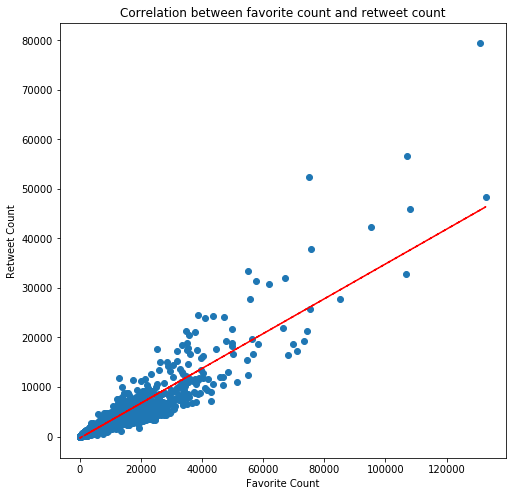

In [65]:
import matplotlib.pyplot as plt
import matplotlib.figure

%matplotlib inline

# Configure plot
fig = plt.figure(figsize=(8, 8))
plt.scatter(twitter_archive_clean.favorite_count, twitter_archive_clean.retweet_count)
plt.title("Correlation between favorite count and retweet count")
plt.xlabel("Favorite Count")
plt.ylabel("Retweet Count")

#Configure trendline
z = np.polyfit(twitter_archive_clean.favorite_count, twitter_archive_clean.retweet_count, 1)
p = np.poly1d(z)
plt.plot(twitter_archive_clean.favorite_count,p(twitter_archive_clean.favorite_count),"r--")

plt.show();

From the chart above, we can see that we have a positive correlation between the number of likes and retweets our tweets receive.

People seem to love Golden Retrievers! Let's plot a bar chart to graphically represent this.

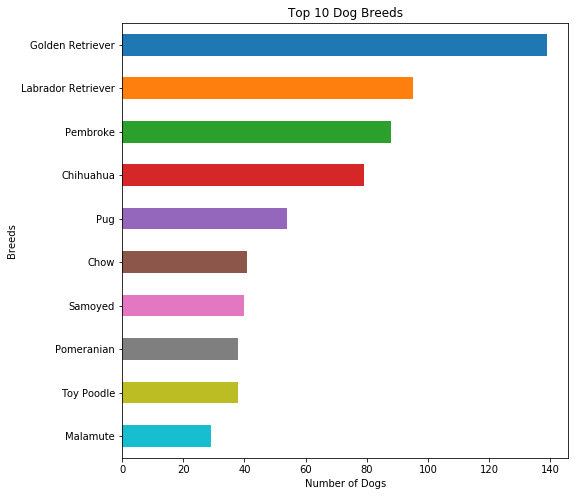

In [66]:
# Create a bar chart for the top 10 dog breeds in the dataset
top_10_dog_breeds = twitter_archive_clean.probability.value_counts().nlargest(10)
top_10_dog_breeds.plot(kind="barh", figsize=(8,8));
plt.xlabel("Number of Dogs")
plt.ylabel("Breeds")
plt.title("Top 10 Dog Breeds")
plt.gca().invert_yaxis()
plt.show();

The pie chart below shows that only 74% of the images in our dataset are for dogs.

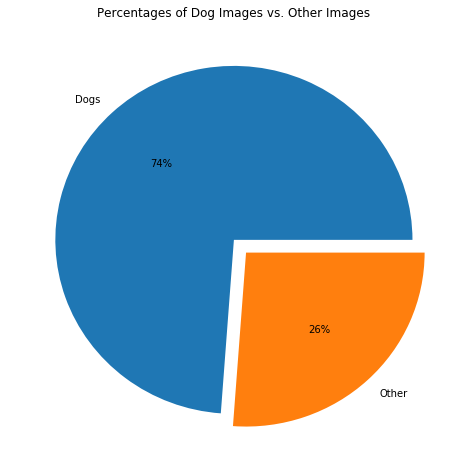

In [67]:
dog_image_count = len(df_image_clean[df_image_clean.is_dog])
non_dog_image_count = len(df_image_clean[~df_image_clean.is_dog])

_labels = ["Dogs", "Other"]
_values = [dog_image_count, non_dog_image_count]
_explode = [0, 0.1]
fig= plt.figure(figsize=(8, 8))
plt.title("Percentages of Dog Images vs. Other Images")
plt.pie(_values, labels = _labels, explode=_explode, shadow=False, autopct='%.0f%%')
#plt.pie(_values, labels = _labels, shadow=False, autopct='%.0f%%')
plt.show();